In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tslearn as ts
sns.set_theme(style="whitegrid", font_scale=2, palette='Dark2')


In [42]:
data = pd.read_csv('holy_bible.txt', sep = ',', header=None)
data.columns= ['devices', 'throughput', 'probsucc', 'probfail']
data = data.groupby('devices').mean()

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/1189303886.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_throughput.pdf', bool=True)


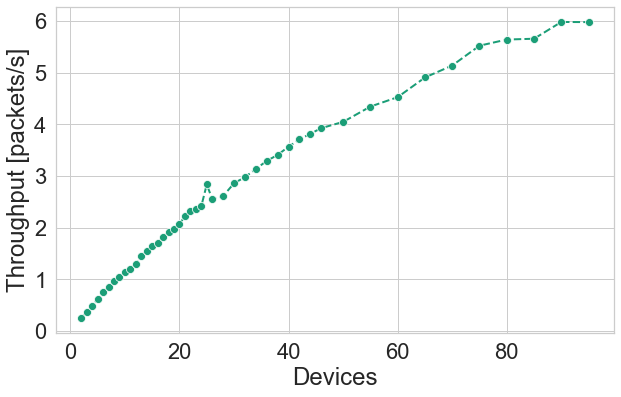

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=data, x='devices', y='throughput', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--')
ax.set_xlabel('Devices')
ax.set_ylabel('Throughput [packets/s]')
fig.savefig('lorawan_throughput.pdf', bool=True)

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/2347102761.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_prob.pdf', bool=True)


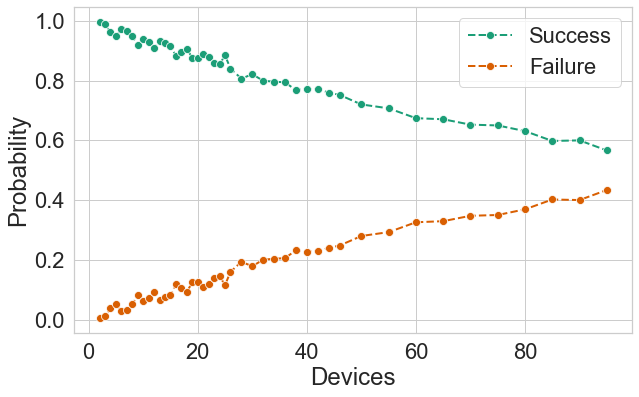

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=data, x='devices', y='probsucc', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Success')
sns.lineplot(data=data, x='devices', y='probfail', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Failure')
ax.set_xlabel('Devices')
ax.set_ylabel('Probability')
fig.savefig('lorawan_prob.pdf', bool=True)

In [80]:
data_24 = data[:23]
target = data_24.iloc[-1,1]
target_throughput = data_24.iloc[-1,0]


data_24['percentage_success_wrt24'] = data_24['probsucc'].apply(lambda x: x/target*100-100)
data_24['percentage_throughput_wrt24'] = data_24['throughput'].apply(lambda x: x/target_throughput*100-100)

data_24['percentage_success_wrt24_rolling'] = data_24['percentage_success_wrt24'].rolling(window=4).mean()


/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/4255235468.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_24['percentage_success_wrt24'] = data_24['probsucc'].apply(lambda x: x/target*100-100)
/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/4255235468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_24['percentage_throughput_wrt24'] = data_24['throughput'].apply(lambda x: x/target_throughput*100-100)
/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykern

In [81]:
data_24

,throughput,probsucc,probfail,percentage_success_wrt24,percentage_throughput_wrt24,percentage_success_wrt24_rolling
devices,,,,,,
2,0.245455,0.996047,0.003953,16.648974,-89.849624,NaN
3,0.364545,0.987603,0.012397,15.660060,-84.924812,NaN
4,0.477273,0.961644,0.038356,12.619889,-80.263158,NaN
5,0.621818,0.947870,0.052130,11.006769,-74.285714,13.983923
6,0.760000,0.972446,0.027554,13.884996,-68.571429,13.292928
7,0.850000,0.967246,0.032754,13.276024,-64.849624,12.696920
8,0.966364,0.948420,0.051580,11.071245,-60.037594,12.309758
9,1.043636,0.918323,0.081677,7.546529,-56.842105,11.444698
10,1.150000,0.937670,0.062330,9.812271,-52.443609,10.426517


/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/3106394935.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('percentage_prob_wrt24_rolling4.pdf', bool=True)


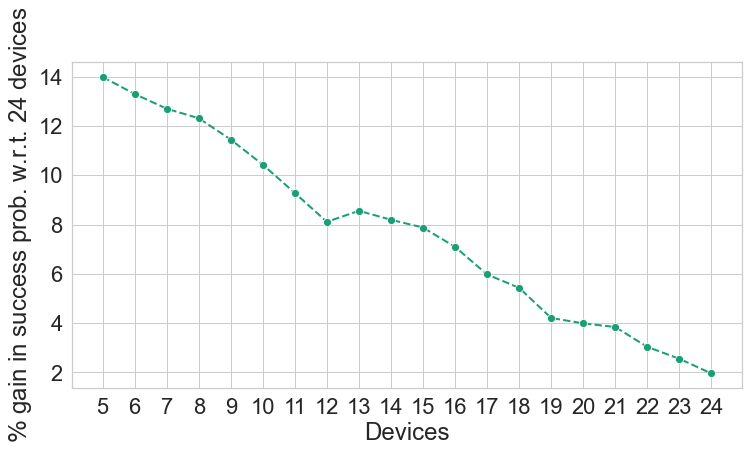

In [85]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=data_24, x='devices', y='percentage_success_wrt24_rolling', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--')
ax.set_xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

ax.set_xlabel('Devices')
ax.set_ylabel(r'$\%$ gain in success prob. w.r.t. 24 devices')
fig.savefig('percentage_prob_wrt24_rolling4.pdf', bool=True)

/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/1041282650.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_throughput_diff.pdf', bool=True)
/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/1041282650.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lorawan_prob_diff.pdf', bool=True)


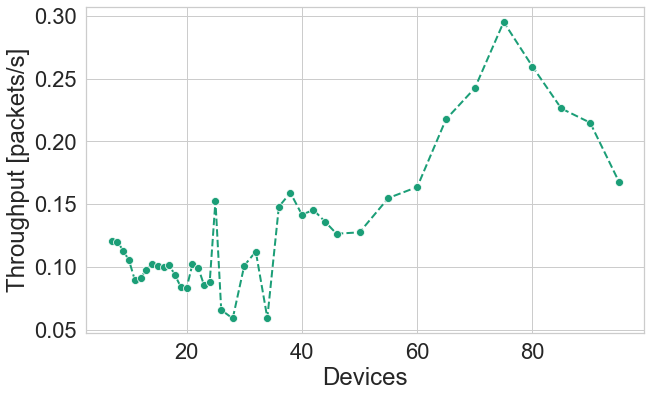

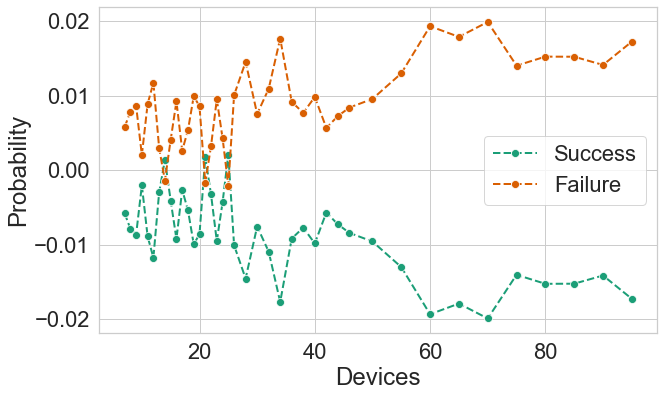

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
diff_data = data.diff()
#rolling mean
diff_data['throughput'] = diff_data['throughput'].rolling(window=5).mean()
sns.lineplot(data=diff_data, x='devices', y='throughput', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--')
ax.set_xlabel('Devices')
ax.set_ylabel('Throughput [packets/s]')
fig.savefig('lorawan_throughput_diff.pdf', bool=True)

diff_data['probsucc'] = diff_data['probsucc'].rolling(window=5).mean()
diff_data['probfail'] = diff_data['probfail'].rolling(window=5).mean()

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=diff_data, x='devices', y='probsucc', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Success')
sns.lineplot(data=diff_data, x='devices', y='probfail', ax=ax, linewidth=2, marker = 'o', markersize=8, linestyle='--', label='Failure')

ax.set_xlabel('Devices')
ax.set_ylabel('Probability')
fig.savefig('lorawan_prob_diff.pdf', bool=True)

In [34]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_60.0dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))


Text(0, 0.5, 'mean delay time')

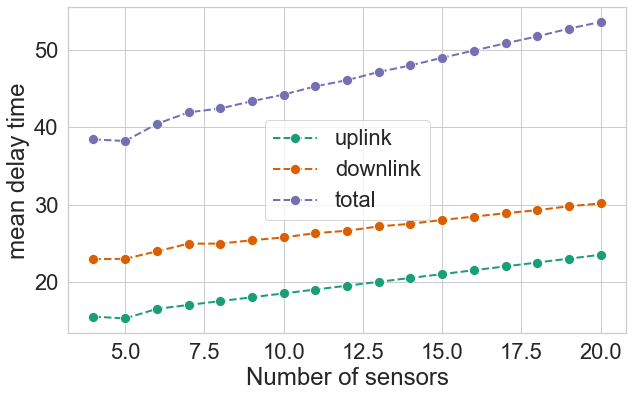

In [37]:
fig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')


/var/folders/gq/gwfhyzf925b2_vdp2wp5svf00000gr/T/ipykernel_59528/2794575061.py:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bool" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('lena_delay.pdf', bool=True)


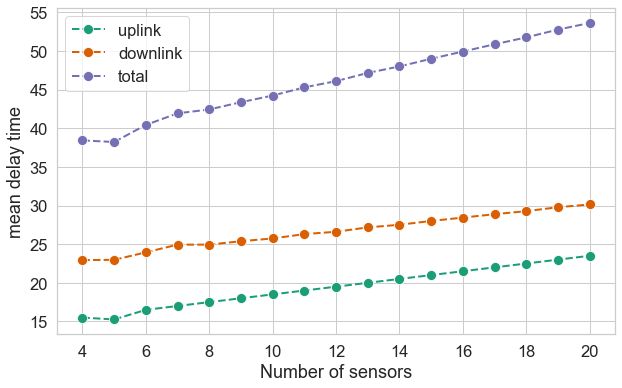

In [38]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []
sns.set_theme(style="whitegrid", font_scale=1.5, palette='Dark2')

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_0.500000dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))

ig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')
fig.savefig('lena_delay.pdf', bool=True)